<a href="https://colab.research.google.com/github/mafenavas/challenge_telecom_x_2/blob/main/%20challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Extracción del Archivo Tratado#

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/drive/MyDrive/Alura Latam/Oracle ONE Next Education/Data Science/gold_data.csv')

In [3]:
datos = datos.dropna()
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,True,DSL,...,True,True,True,True,One year,True,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,False,Male,False,True,True,9,True,True,DSL,...,True,True,True,True,Month-to-month,True,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,True,Male,False,True,True,4,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,True,13,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,True,3,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,True,True,13,True,True,DSL,...,True,True,True,True,One year,True,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,True,Male,False,True,True,22,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,False,Male,False,True,True,2,True,True,DSL,...,True,True,True,True,Month-to-month,True,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,False,Male,False,True,True,67,True,True,DSL,...,True,True,True,True,Two year,True,Mailed check,67.85,4627.65,2.261667


#2. Eliminación de Columnas Irrelevantes#

In [4]:
datos_1 = datos.drop('customerID', axis=1)

# 3. Encoding#

In [5]:
datos_1.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_diarias'],
      dtype='object')

In [6]:
datos_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   bool   
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   bool   
 3   Partner           7256 non-null   bool   
 4   Dependents        7256 non-null   bool   
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   bool   
 7   MultipleLines     7256 non-null   bool   
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   bool   
 10  OnlineBackup      7256 non-null   bool   
 11  DeviceProtection  7256 non-null   bool   
 12  TechSupport       7256 non-null   bool   
 13  StreamingTV       7256 non-null   bool   
 14  StreamingMovies   7256 non-null   bool   
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   bool   
 17  

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
X = datos.drop('Churn', axis=1)
y = datos['Churn']

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   bool   
 3   Partner           7256 non-null   bool   
 4   Dependents        7256 non-null   bool   
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   bool   
 7   MultipleLines     7256 non-null   bool   
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   bool   
 10  OnlineBackup      7256 non-null   bool   
 11  DeviceProtection  7256 non-null   bool   
 12  TechSupport       7256 non-null   bool   
 13  StreamingTV       7256 non-null   bool   
 14  StreamingMovies   7256 non-null   bool   
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   bool   
 17  

In [10]:
columnas = X.columns

In [11]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','Contract', 'PaperlessBilling','PaymentMethod']),remainder='passthrough', sparse_threshold=0, force_int_remainder_cols=False)

In [12]:
X = one_hot.fit_transform(X)

In [13]:
X_1 = pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas))
X_1

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_True,onehotencoder__Partner_True,onehotencoder__Dependents_True,onehotencoder__PhoneService_True,onehotencoder__MultipleLines_True,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_True,...,onehotencoder__PaperlessBilling_True,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__customerID,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_diarias
0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0002-ORFBO,9,65.6,593.3,2.186667
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0003-MKNFE,9,59.9,542.4,1.996667
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0004-TLHLJ,4,73.9,280.85,2.463333
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0011-IGKFF,13,98.0,1237.85,3.266667
4,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0013-EXCHZ,3,83.9,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,9987-LUTYD,13,55.15,742.9,1.838333
7252,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,9992-RRAMN,22,85.1,1873.7,2.836667
7253,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,9992-UJOEL,2,50.3,92.75,1.676667
7254,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,9993-LHIEB,67,67.85,4627.65,2.261667


In [14]:
X_2 = X_1.drop('remainder__customerID', axis=1)
const_cols = X_2.columns[X_2.std() == 0]
X_2 = X_2.drop(columns=const_cols)
X_2

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_True,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_diarias
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,65.6,593.3,2.186667
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,9,59.9,542.4,1.996667
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4,73.9,280.85,2.463333
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13,98.0,1237.85,3.266667
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,83.9,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13,55.15,742.9,1.838333
7252,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22,85.1,1873.7,2.836667
7253,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,50.3,92.75,1.676667
7254,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,67,67.85,4627.65,2.261667


#4. Verificación de la Proporción de Cancelación (Churn)#

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

In [17]:
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [18]:
y= pd.DataFrame(y)

In [19]:
y.value_counts()

,count
0,
0,5387
1,1869


#5. Normalización o Estandarización#

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
normalizacion = MinMaxScaler()
X_normalizado = normalizacion.fit_transform(X_2)
normalizacion

MinMaxScaler()

In [22]:
data= pd.DataFrame(X_normalizado)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.112676,0.471144,0.066294,0.471144
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.112676,0.414428,0.060420,0.414428
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.042254,0.553731,0.030239,0.553731
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.169014,0.793532,0.140670,0.793532
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.028169,0.653234,0.028687,0.653234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.169014,0.367164,0.083556,0.367164
7252,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.295775,0.665174,0.214043,0.665174
7253,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.014085,0.318905,0.008533,0.318905
7254,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.929577,0.493532,0.531831,0.493532


# 6. Análisis de Correlación#

In [62]:
print(data.corr())

          0         1         2         3         4         5         6   \
0   1.000000 -0.004239  0.005502 -0.009478  0.005082 -0.001181  0.007063   
1  -0.004239  1.000000 -0.108145  0.254868 -0.182481  0.136278 -0.047054   
2   0.005502 -0.108145  1.000000 -0.640289 -0.379770 -0.063967  0.047521   
3  -0.009478  0.254868 -0.640289  1.000000 -0.467424  0.242172 -0.074418   
4   0.005082 -0.182481 -0.379770 -0.467424  1.000000 -0.218034  0.034932   
5  -0.001181  0.136278 -0.063967  0.242172 -0.218034  1.000000 -0.570885   
6   0.007063 -0.047054  0.047521 -0.074418  0.034932 -0.570885  1.000000   
7  -0.005361 -0.114058  0.029273 -0.211462  0.220978 -0.621734 -0.288116   
8  -0.018316 -0.015819  0.024545 -0.025822  0.002849 -0.179642  0.056549   
9   0.001102 -0.022914  0.053491 -0.051025 -0.000110 -0.207381  0.070135   
10  0.002149  0.170320 -0.104890  0.339092 -0.287659  0.331540 -0.109325   
11  0.014537 -0.153742  0.041502 -0.306374  0.321209  0.006871 -0.001336   
12  0.005936

# 7. Análisis Dirigido #

In [24]:
import plotly.express as px

px.box(datos, x='tenure', color='Churn')

Relación de número de meses que los clientes han pertenecido a la empresa. Los clientes nuevos suelen retirarse del servicio.

In [25]:
px.box(datos, x='Charges.Total', color='Churn')

# 8. Separación de Datos#

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_2,y,stratify=y,random_state=5)

#9. Creación de Modelos#

## 9.1 Baseline##

In [27]:
from sklearn.model_selection import train_test_split

X_2_train,X_test,y_train,y_test = train_test_split(X_2,y,stratify=y,random_state=5)

In [28]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_2_train,y_train)

dummy.score(X_test,y_test)

0.7425578831312017

##9.2 Arboles de decisión##

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
modelo_arbol = DecisionTreeClassifier()
modelo_arbol.fit(X_2_train, y_train)

DecisionTreeClassifier()

In [31]:
modelo_arbol.score(X_test,y_test)

0.7183020948180816

In [32]:
modelo_arbol = DecisionTreeClassifier(max_depth= 3, random_state=5)
modelo_arbol.fit(X_2_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [33]:
modelo_arbol.score(X_test,y_test)

0.7877618522601985

##9.3 KNN ##

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [37]:
X_test_normalizado = normalizacion.transform(X_test)

In [38]:
knn.score(X_test_normalizado,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



0.7425578831312017

## 10. Evaluación de los Modelos##

## 10.1 Evaluando el modelo de Árbol de decisión##

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_True,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_diarias
6284,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,54.15,101.65,1.805
5321,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24,80.5,2088.45,2.683333
5849,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,72,115.5,8425.15,3.85
387,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,29,19.55,521.8,0.651667
4850,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,86.8,620.35,2.893333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,71,47.05,3263.6,1.568333
1579,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,64,81.05,5135.35,2.701667
176,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8,54.4,475.1,1.813333
761,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,56,75.85,4261.2,2.528333


In [41]:
X_train_val,X_test,y_train_val,y_test = train_test_split(X_2,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,stratify=y_train_val,random_state=5)

In [42]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)

print(f' La exactitud del modelo  con el conjunto de entrenamiento es: {modelo.score(X_train,y_train)} ')
print(f' La exactitud del modelo con el conjunto de validación es: {modelo.score(X_val,y_val)} ')

 La exactitud del modelo  con el conjunto de entrenamiento es: 0.9913513513513513 
 La exactitud del modelo con el conjunto de validación es: 0.7243839169909209 


El modelo de árbol de decisión presentó Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

##10.2 Matriz de Confusión##

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[923 222]
 [203 194]]


In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

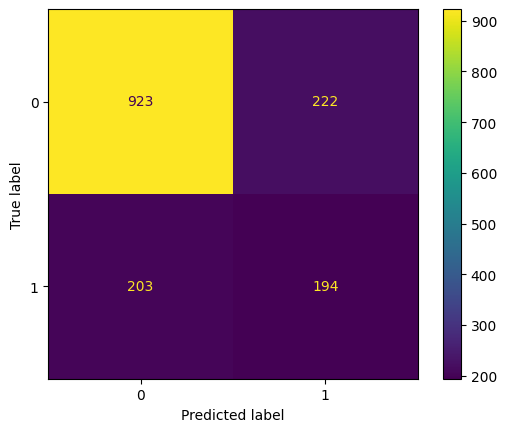

In [46]:
visualizacion= ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot();

##10.3 Métricas de evaluación: Exactitud, precisión y recall (sensibilidad)##

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [48]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.46634615384615385
La sensibilidad (Recall) del modelo es: 0.48866498740554154
La exactitud (accuracy) del modelo es: 0.7243839169909209


In [49]:
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

El F1-score del modelo es: 0.47724477244772445


## 10.4 Evaluando el modelo de KNN##

In [50]:
X_normalizado_train_val,X_test_normalizado,y_train_val,y_test = train_test_split(X_normalizado,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X_normalizado_train_val,y_train_val,stratify=y_train_val,random_state=5)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier()
modelo.fit(X_train,y_train)

print(f' La exactitud del modelo  con el conjunto de entrenamiento es: {modelo.score(X_train,y_train)} ')
print(f' La exactitud del modelo con el conjunto de validación es: {modelo.score(X_val,y_val)} ')

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



 La exactitud del modelo  con el conjunto de entrenamiento es: 0.8348108108108108 
 La exactitud del modelo con el conjunto de validación es: 0.7730220492866408 


##10.5 Matriz de Confusión##

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[997 148]
 [202 195]]


In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

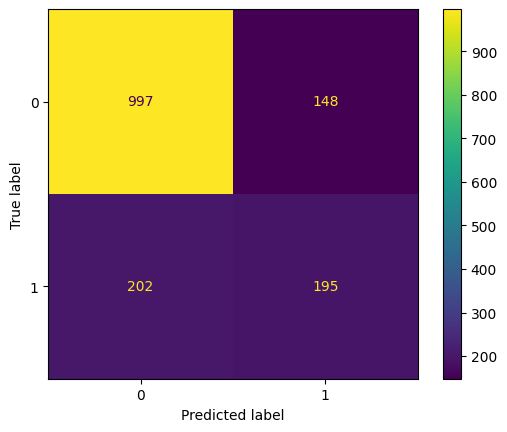

In [55]:
visualizacion= ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot();

##10.6 Métricas de evaluación: Exactitud, precisión y recall (sensibilidad)##

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [57]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.5685131195335277
La sensibilidad (Recall) del modelo es: 0.491183879093199
La exactitud (accuracy) del modelo es: 0.7730220492866408


In [58]:
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

El F1-score del modelo es: 0.527027027027027


¿Cuál es el mejor modelo?
Conclusión

El árbol de decisión tiene altísima exactitud en entrenamiento, pero pierde mucho en validación → sobreajuste fuerte.

El KNN logra un mejor equilibrio:

Generaliza mejor (validación > 0.77).

Tiene mayor precisión y F1-score.

Su recall es prácticamente igual al del árbol.

👉 El mejor modelo es KNN, porque ofrece un rendimiento más robusto y balanceado, mientras que el árbol de decisión se queda corto fuera del entrenamiento.

El modelo de KNN supera al árbol de decisión en capacidad de generalización, mostrando un menor sobreajuste y un mejor F1-score (0.527 vs. 0.477). Aunque el árbol tiene mayor exactitud en entrenamiento, no logra mantener el desempeño en validación, mientras que KNN presenta resultados más consistentes y equilibrados.

# 11. Análisis de la Importancia de las Variables#

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

In [71]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_2,y, test_size=0.3, random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas= {
      'RMSE':(round(rmse**(1/2),4)),
      'MAE':round(mae,4),
      'R2': round(r2,4)
  }

  return metricas

In [73]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, random_state=47)
modelo.fit(X_train,y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 0.3617, 'MAE': 0.2699, 'R2': 0.3044}

El modelo en promedio se equivoca ±0.36 unidades respecto al valor real.
El error medio de predicción es de ±0.27 unidades.
Va de 0 a 1 (aunque puede ser negativo si el modelo es peor que predecir la media).

Un R² de 0.30 significa que tu modelo explica aproximadamente el 30% de la variabilidad de los datos.

Esto sugiere que el modelo tiene cierto poder predictivo, pero aún deja un 70% de variabilidad sin explicar.

Tus errores (RMSE y MAE) son relativamente bajos, lo cual es bueno.

Sin embargo, el R² = 0.30 indica que el modelo no está capturando toda la complejidad de la variable dependiente.

Es un modelo aceptable, pero aún hay espacio para mejorarlo (por ejemplo, probando otras variables, transformaciones o modelos más complejos).

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



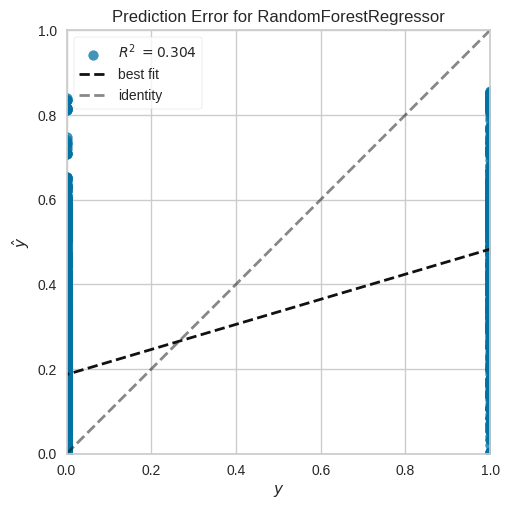

In [74]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



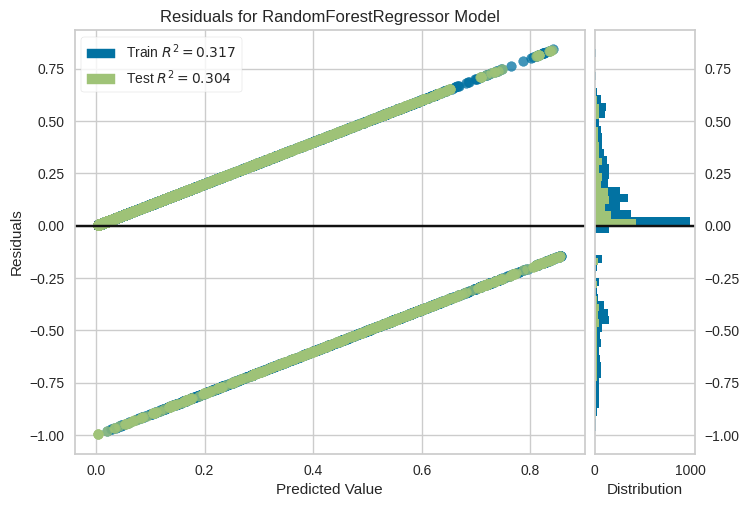

In [75]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test)

In [76]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2': 'r2'
}

cv= KFold(n_splits=5,shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train,y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([1.97449493, 1.18451595, 0.85482717, 0.85364342, 0.83622479]),
 'score_time': array([0.06258607, 0.02004695, 0.02031183, 0.01978707, 0.02025056]),
 'test_RMSE': array([-0.3851332 , -0.36782811, -0.36843469, -0.3802386 , -0.37488317]),
 'test_MAE': array([-0.28637127, -0.27239189, -0.27515276, -0.28678537, -0.28267891]),
 'test_R2': array([0.23065077, 0.28216655, 0.28712514, 0.26759902, 0.27329105])}

In [77]:
importances= modelo.feature_importances_

In [79]:
feature_importances = pd.DataFrame({'Features':X_2.columns, 'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Features,Importances
5,onehotencoder__Contract_Month-to-month,47.56
12,remainder__tenure,14.52
3,onehotencoder__InternetService_Fiber optic,12.73
14,remainder__Charges.Total,8.68
15,remainder__Cuentas_diarias,5.20
13,remainder__Charges.Monthly,5.13
10,onehotencoder__PaymentMethod_Electronic check,2.65
1,onehotencoder__SeniorCitizen_True,0.67
4,onehotencoder__InternetService_No,0.65
6,onehotencoder__Contract_One year,0.65


📊 Interpretación de las variables más importantes

Contract_Month-to-month (47.56%)

Es, con diferencia, la variable más importante.

Indica que los clientes con contrato mes a mes son los que más influyen en la predicción del modelo.

Esto tiene mucho sentido en problemas como churn (deserción de clientes): los que no tienen un compromiso largo suelen cancelar más fácilmente.

tenure (14.52%)

La antigüedad del cliente es la segunda variable más relevante.

Clientes con más tiempo en la empresa suelen ser más estables → menor probabilidad de churn.

InternetService_Fiber optic (12.73%)

Los clientes que tienen fibra óptica son un segmento clave.

Muchas veces se asocia con facturas más altas y, por tanto, mayor propensión a cancelar si el servicio no cumple expectativas.

Charges.Total (8.68%)

Lo que el cliente ha pagado históricamente también influye.

Clientes con pagos acumulados bajos suelen ser más recientes → más propensos a cancelar.



In [80]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel= X_test[selected_features]
  model_features.fit(X_train_sel,y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,0.3962,0.3634,0.3616,0.3617,0.3617,0.3617,0.3617
MAE,0.3203,0.2693,0.2693,0.2698,0.2697,0.2697,0.2697
R2,0.1656,0.2979,0.3048,0.3046,0.3045,0.3045,0.3045


In [81]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(10,16)

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel= X_test[selected_features]
  model_features.fit(X_train_sel,y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,0.3616,0.3617,0.3616,0.3618,0.3618,0.3617
MAE,0.2693,0.2693,0.2693,0.2696,0.2697,0.2698
R2,0.3048,0.3047,0.3048,0.3043,0.3042,0.3046


In [83]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X_2[selected_features]
X_selected_features

,onehotencoder__Contract_Month-to-month,remainder__tenure,onehotencoder__InternetService_Fiber optic,remainder__Charges.Total,remainder__Cuentas_diarias,remainder__Charges.Monthly,onehotencoder__PaymentMethod_Electronic check,onehotencoder__SeniorCitizen_True,onehotencoder__InternetService_No,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__InternetService_DSL,onehotencoder__PaymentMethod_Mailed check
0,0.0,9,0.0,593.3,2.186667,65.6,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1.0,9,0.0,542.4,1.996667,59.9,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,4,1.0,280.85,2.463333,73.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,13,1.0,1237.85,3.266667,98.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3,1.0,267.4,2.796667,83.9,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,13,0.0,742.9,1.838333,55.15,0.0,0.0,0.0,1.0,0.0,1.0,1.0
7252,1.0,22,1.0,1873.7,2.836667,85.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7253,1.0,2,0.0,92.75,1.676667,50.3,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7254,0.0,67,0.0,4627.65,2.261667,67.85,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [84]:
X_train,X_test,y_train,y_test = train_test_split(X_selected_features,y,random_state=42)

In [85]:
param_grid ={
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]
}

In [86]:
from sklearn.model_selection import GridSearchCV

cv= KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2', cv=cv)

model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [87]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [88]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 0.3574, 'MAE': 0.2676, 'R2': 0.3111}

In [89]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,0.3616,0.3617,0.3616,0.3618,0.3618,0.3617,0.3574
MAE,0.2693,0.2693,0.2693,0.2696,0.2697,0.2698,0.2676
R2,0.3048,0.3047,0.3048,0.3043,0.3042,0.3046,0.3111
